## Importing Dataset

In [1]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

In [2]:
print(df_train.head())
print(df_train.shape)

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
(60000, 785)


In [3]:
print(df_test.head())
print(df_test.shape)

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
(10000, 785)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
X_train = df_train.iloc[:, 1:].values
Y_train = df_train.iloc[:, [0]].values

print(X_train.shape)
print(Y_train.shape)

print(X_train)
print(Y_train)

(60000, 784)
(60000, 1)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[5]
 [0]
 [4]
 ...
 [5]
 [6]
 [8]]


In [6]:
X_test = df_test.iloc[:, 1:].values
Y_test = df_test.iloc[:, [0]].values

print(X_test.shape)
print(Y_test.shape)

print(X_test)
print(Y_test)

(10000, 784)
(10000, 1)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[7]
 [2]
 [1]
 ...
 [4]
 [5]
 [6]]


## Checking Dataset

In [7]:
import matplotlib.pyplot as plt

In [8]:
print(df_train.iloc[0])
print(df_train.iloc[0].values.shape)

label    5
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 0, Length: 785, dtype: int64
(785,)


In [9]:
print(df_train.iloc[0][0])

5


[9]


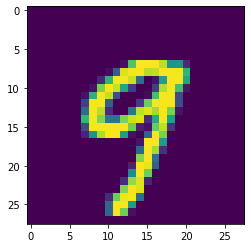

In [10]:
print(Y_train[45])
plt.imshow(X_train[45].reshape(28,28))

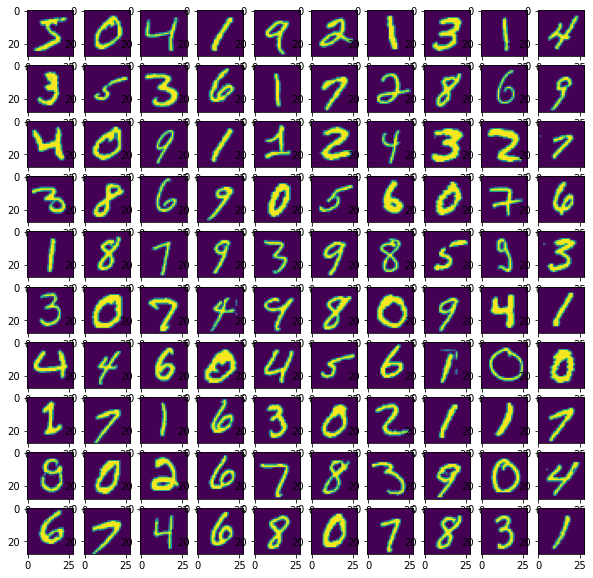

In [11]:
fig, axes = plt.subplots(10,10, figsize=(10,10))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28,28))

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train,Y_train.ravel())

In [ ]:
Y_train_pred = model_svm.predict(X_train)
Y_test_pred = model_svm.predict(X_test)

## Evaluating Model

In [ ]:
from sklearn.metrics import confusion_matrix
print("Train consion matrix:\n"+str(confusion_matrix(Y_train,Y_train_pred)))
print('\n\n')
print("Test consion matrix:\n"+str(confusion_matrix(Y_test,Y_test_pred)))

In [ ]:
from sklearn.metrics import accuracy_score

print("Train accuracy: "+str(accuracy_score(Y_train,Y_train_pred)))
print("Test accuracy: "+str(accuracy_score(Y_test,Y_test_pred)))

In [ ]:
from sklearn.metrics import classification_report
print("Train classification report: \n"+str(classification_report(Y_train,Y_train_pred)))
print('\n\n')
print("Test classification report: \n"+str(classification_report(Y_test,Y_test_pred)))

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_train,Y_train_pred))

In [ ]:
sns.heatmap(confusion_matrix(Y_test,Y_test_pred))